In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = [
    "ZS", "VRSN", "VRNS", "TENB", "SPLK", "S", "RPD", "QLYS", "PANW", "OKTA", "NET", "LDOS", "GEN", "FTNT", "FFIV",
    "DOCU", "CYBR", "CVLT", "CSCO", "CRWD", "CHKP", "BAH", "AKAM",
]

In [55]:
ohlc = yf.download(tickers, period="max")
#ohlc = pd.read_csv("stock_prices.csv")

[*********************100%%**********************]  23 of 23 completed


In [11]:
### izvedi samo jednom!!!
#ohlc.to_csv("stock_prices.csv")

In [56]:
prices = ohlc["Adj Close"]

In [10]:
prices.tail()

,AKAM,BAH,CHKP,CRWD,CSCO,CVLT,CYBR,DOCU,FFIV,FTNT,...,OKTA,PANW,QLYS,RPD,S,SPLK,TENB,VRNS,VRSN,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-07,108.860001,123.150002,137.860001,192.360001,53.130001,69.389999,182.639999,41.080002,156.110001,49.520000,...,68.449997,242.080002,172.179993,50.380001,15.940000,147.169998,38.029999,35.259998,203.860001,171.389999
2023-11-08,110.559998,124.790001,137.559998,193.830002,53.000000,69.470001,183.369995,41.130001,155.839996,50.240002,...,67.449997,241.080002,167.429993,50.930000,15.640000,146.710007,37.360001,35.360001,205.020004,173.960007
2023-11-09,109.790001,124.599998,138.309998,190.759995,52.000000,68.949997,181.869995,40.040001,155.919998,49.669998,...,66.300003,242.589996,167.979996,50.200001,15.290000,146.550003,37.130001,35.310001,204.039993,170.699997
2023-11-10,110.769997,126.000000,142.050003,196.309998,52.590000,70.349998,183.949997,40.980000,159.050003,50.820000,...,67.769997,253.509995,171.720001,50.380001,15.680000,147.000000,37.410000,35.560001,207.259995,175.039993
2023-11-13,110.980003,127.339996,143.240005,200.960007,52.230000,70.500000,182.770004,41.119999,158.619995,50.299999,...,68.230003,255.639999,172.929993,50.500000,16.049999,146.800003,37.279999,35.880001,208.119995,178.169998


In [11]:
import pypfopt

In [57]:
from pypfopt import risk_models, expected_returns
from pypfopt import plotting

mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)

<Axes: >

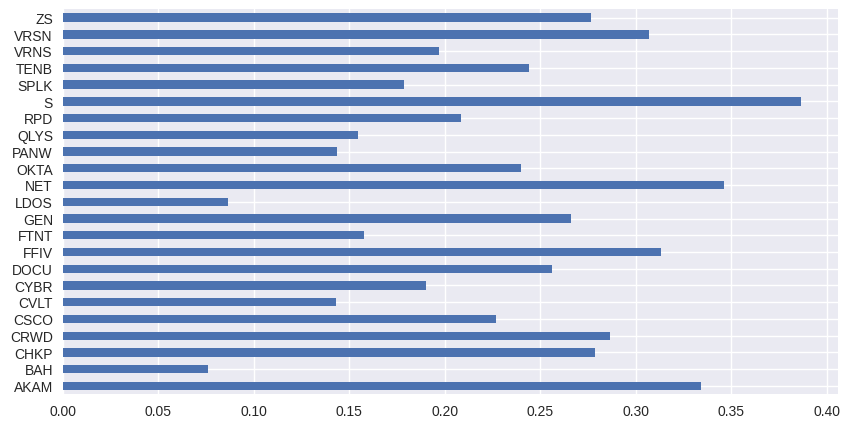

In [58]:
mu.plot.barh(figsize=(10, 5))

<Axes: >

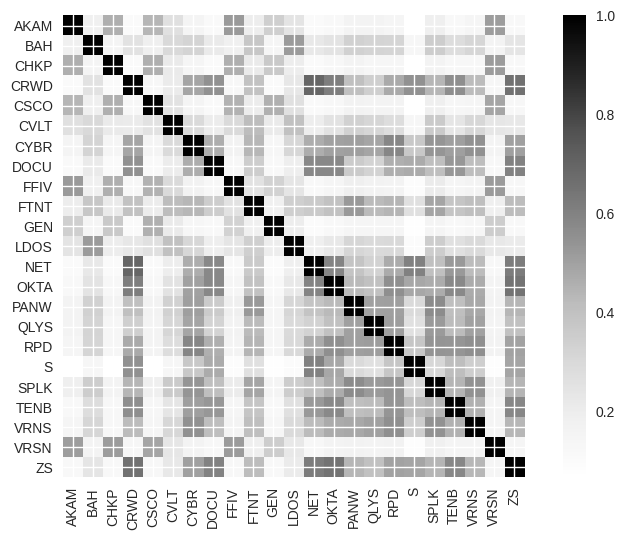

In [59]:
plotting.plot_covariance(S, plot_correlation=True)

In [60]:
initial_weights = [0.0345, 0.0330, 0.0316, 0.0597, 0.0839, 0.0233, 0.0379, 0.0428, 0.0281, 0.0544, 0.0351, 0.0334, 0.0605, 0.0480, 0.0660, 0.0302, 0.0425, 0.0480, 0.0496, 0.0362, 0.0315, 0.0338, 0.0561]

In [61]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.0075)
ef.add_objective(objective_functions.L2_reg, gamma=1)
ef.min_volatility()
weights = ef.clean_weights()

In [62]:
weights

OrderedDict([('AKAM', 0.0345),
             ('BAH', 0.04756),
             ('CHKP', 0.03707),
             ('CRWD', 0.05082),
             ('CSCO', 0.04551),
             ('CVLT', 0.04176),
             ('CYBR', 0.04113),
             ('DOCU', 0.0428),
             ('FFIV', 0.03416),
             ('FTNT', 0.04805),
             ('GEN', 0.03642),
             ('LDOS', 0.04582),
             ('NET', 0.04918),
             ('OKTA', 0.048),
             ('PANW', 0.05028),
             ('QLYS', 0.042),
             ('RPD', 0.0425),
             ('S', 0.048),
             ('SPLK', 0.04692),
             ('TENB', 0.04349),
             ('VRNS', 0.03995),
             ('VRSN', 0.03499),
             ('ZS', 0.04908)])

In [63]:
ef.portfolio_performance(verbose=True)

Expected annual return: 22.8%
Annual volatility: 11.2%
Sharpe Ratio: 1.85


(0.22789156352940976, 0.11236397987370865, 1.8501619804057245)

In [ ]:
pd.Series(weights).plot.pie(figsize=(10, 10))